In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Tom data (missing data)

- Detta sker när ett värde helt enkelt är borta, eller värdet == None/NaN (inte nummer) i en eller flera kolumner. Detta skapar stora problem om datan ska användas för tex maskininlärning.

**Dåliga grejer om det finns tom data:**
- visualisering
- arithmatic computations
- maskininlärningsalgoritmer


**vanliga sätt att hantera detta** *Ersätt==Impute*
- Ta bort hela rader eller kolumner som saknar data
- Ersätt det tomma värdet med en median/medelvärde av de andra värden
- Ersätt med *mode* (det mest förekommande värdet)
- Ersätt med värdet framför eller bakom i raden eller kolumnen
- Interpolera data mellan två punkter. (4,6,8,4,-,-,12 skulle bli 4,6,8,4,*7*,*9*,12 typ)

*Märk väl att expertinformation är ofta nödvändigt för att veta vilken av ovanstående metoder bör användas för att inte sabba datan*

In [15]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
df = df[df > 0]
df

,A,B,C,D
0,0.362191,NaN,NaN,1.465258
1,NaN,NaN,2.125758,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.716566
4,1.482294,NaN,0.417357,NaN
5,0.813474,0.595662,1.701784,0.204527
6,NaN,0.918597,0.945554,NaN
7,NaN,NaN,0.943729,NaN
8,NaN,0.863345,NaN,0.744961
9,NaN,NaN,NaN,NaN


In [16]:
copy = df.copy()
copy.drop(columns="B")

,A,C,D
0,0.362191,NaN,1.465258
1,NaN,2.125758,NaN
2,NaN,NaN,NaN
3,NaN,NaN,0.716566
4,1.482294,0.417357,NaN
5,0.813474,1.701784,0.204527
6,NaN,0.945554,NaN
7,NaN,0.943729,NaN
8,NaN,NaN,0.744961
9,NaN,NaN,NaN


### ta bort och fyll-funktioner:
- dropna() en funktion som tar bort rader eller koumner som är tomma Default är på rad-nivå
- isna() visar True för alla som är tomma
- fillna() fyller tomma värden med något

In [35]:
copy = df.copy()
#copy.dropna(how="all", subset="C") # default är (how="any"/thresh=None) Går inte att använda båda samtidigt
copy.dropna(axis="columns", thresh=5)

,C
0,NaN
1,2.125758
2,NaN
3,NaN
4,0.417357
5,1.701784
6,0.945554
7,0.943729
8,NaN
9,NaN


In [18]:
copy = df.copy()
copy.isna()

,A,B,C,D
0,False,True,True,False
1,True,True,False,True
2,True,True,True,True
3,True,True,True,False
4,False,True,False,True
5,False,False,False,False
6,True,False,False,True
7,True,True,False,True
8,True,False,True,False
9,True,True,True,True


In [36]:
copy = df.copy()
copy.fillna("-") # fyll med samma datatyp som resterande

,A,B,C,D
0,0.362191,-,-,1.465258
1,-,-,2.125758,-
2,-,-,-,-
3,-,-,-,0.716566
4,1.482294,-,0.417357,-
5,0.813474,0.595662,1.701784,0.204527
6,-,0.918597,0.945554,-
7,-,-,0.943729,-
8,-,0.863345,-,0.744961
9,-,-,-,-


In [40]:
copy = df.copy()
copy["A"].mean() # Smidigt sätt att räkna ut medelvärdet (.median() för median)

0.8859862772655694

In [39]:
copy = df.copy()
copy["A"].fillna(copy["A"].median())

0    0.362191
1    0.813474
2    0.813474
3    0.813474
4    1.482294
5    0.813474
6    0.813474
7    0.813474
8    0.813474
9    0.813474
Name: A, dtype: float64

In [41]:
copy = df.copy()
copy["A"].mode() # Returnerar en lista, och kann komma åt som vanligt med [] osv. Används mest för kategorier
                 # där det är vanligt att det finns flera värden som är lika vanliga

0    0.362191
1    0.813474
2    1.482294
Name: A, dtype: float64

In [43]:
copy = df.copy()
copy["B"].ffill() # Fyller med föregående värde
copy["B"].bfill() # Fyller med efterföljande värde

0    0.595662
1    0.595662
2    0.595662
3    0.595662
4    0.595662
5    0.595662
6    0.918597
7    0.863345
8    0.863345
9         NaN
Name: B, dtype: float64

In [55]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].interpolate(inplace=True) # Fyller med ett värde mellan föregående och efterföljande värde
#copy

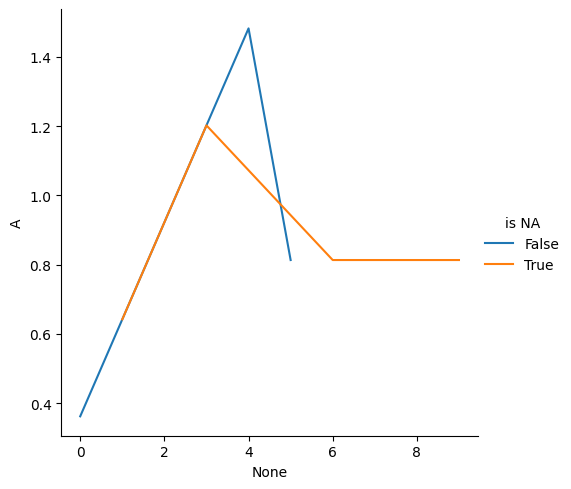

In [57]:
sns.relplot(data=copy, x=copy.index, y="A", hue="is NA", kind="line")